<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) | [Contents](Index.ipynb) | [Multiple Subplots](04.08-Multiple-Subplots.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.07-Customizing-Colorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 自訂色彩條

在Matplotlib，色彩條是一個分開的軸，可以提供圖表中各顏色代表意義的一個鍵值。

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

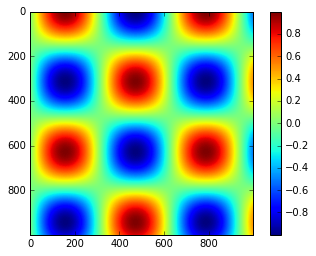

In [3]:
# 最簡單的色彩條可以使用plt.colorbar來建立
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## 自訂色彩條

可以使用``cmap``參數指定色彩定義表到建立這次視覺化的繪圖函式中:

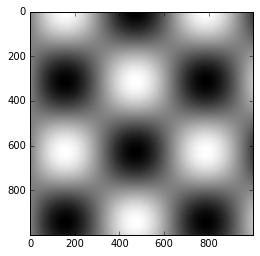

In [4]:
plt.imshow(I, cmap='gray');

### 色彩對應表的選擇

大體上來說，你應該會注意到有三種類別的色彩對應表:
- *Sequential色彩對應表*:由連續的一系列色彩所組成(e.g.,``binary``或``viridis``)
- *Divergent色彩對應表*:通常包含2個獨立的顏色，然後從平均值中顯示正偏差和負偏差 (e.g.,``RdBu``或``PuOr``).
- *Qualitative色彩對應表*:沒有特別順序的色彩所組成的(e.g.,``rainbow``或``jet``).

可以把``jet``色彩條轉換成黑和白來檢視這樣的情況:

In [6]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """給一個色彩對應表，然後傳回一個灰階的版本"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 轉換RGBA成為感知的灰階亮度
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """畫出和它等價的灰階版本"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

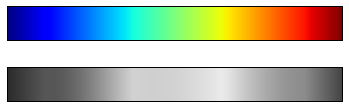

In [7]:
# 不均勻的明亮度
view_colormap('jet')

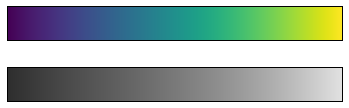

In [8]:
# 能在分佈範圍內具有均勻的亮度變化
view_colormap('viridis')

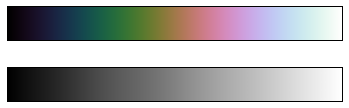

In [9]:
# 適用在連續資料中比較好的選擇是cubehelix色彩對應表
view_colormap('cubehelix')

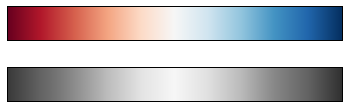

In [10]:
# 從平均顯示正負偏差值(Red-Blue)
# 這樣雙色的色彩對應表即可使用，注意:正負資訊在轉換成灰階會將會遺失
view_colormap('RdBu')

### 色彩的限制和延伸

Matplotlib允許非常大範圍的色彩條客製化。色彩條本身就是一個``plt.Axes``的執行實例，因此所有先前學習過的軸和刻度格式都可以套用。

色彩條有一些有趣的使用彈性，例如可以窄化彩色的限制，以及透過``extend``屬性，使用三角形箭頭指向最上面和最下面的位置。

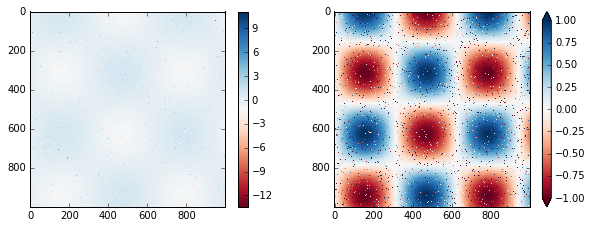

In [12]:
# 製造一個影像中1%的雜訊
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1); # 關鍵步驟

左邊的panel，預設的色影限制反應了雜訊點，而雜訊的範圍完全把感興趣的樣式清掉。

右邊的panel，手動設定顏色的限制，而且加上延伸去指示超過和低於限制的值，可在視覺化上更有用。

### 離散的色彩條

色彩對應預設值是連續的，若想用離散值的方式呈現就要使用``plt.cm.get_cmap()``函式，然後傳入一個合適的色彩對應表明稱以及要呈現之箱子裡的數目:

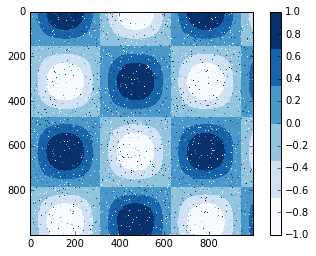

In [14]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## 範例:手寫數字

本範例資料可在Scikit-Learn中被找到，它是由接近2,000個 $8 \times 8$ 用來顯示多樣化手寫數字縮圖所組成。

先從下載數字資料以及使用``plt.imshow()``顯示出其中的幾個範例圖形開始:

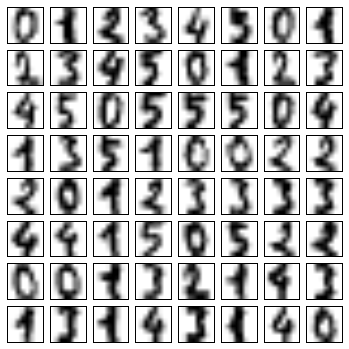

In [16]:
# 載入0到5的數字影像，然後顯示一些出來
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [18]:
# 使用IsoMap去把這些數字元投影到二維空間
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


在此使用之前的離散色彩對應表檢視結果，設定``ticks``和``clim``以改進結果色彩條的美觀:

In [19]:
projection

array([[-155.39370696,   37.56409896],
       [  86.09900953,   69.08238132],
       [ 109.65330203,  -31.77211424],
       ...,
       [ -23.45342606,  111.4734632 ],
       [ -24.19336145,   94.86999685],
       [-111.6396762 ,   65.91710246]])

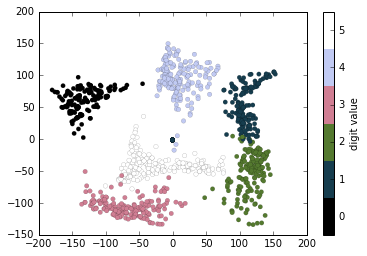

In [ ]:
# 繪出結果
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

投影方式可以有有趣的觀察:
1. 5和3的範圍在投影中幾乎重疊，代表有些5和3不好辨識
2. 0和1看起來不容易被混淆

<!--NAVIGATION-->
< [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) | [Contents](Index.ipynb) | [Multiple Subplots](04.08-Multiple-Subplots.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.07-Customizing-Colorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
